# **광진구 사회적 기업 지도**
53개의 회원사 자료 업데이트
## **1 데이터 내용 살펴보기**

In [13]:
import pandas as pd
table = pd.read_csv("./data/socialmap_gj_geo.csv").fillna('')
table.head(3)

,name,address,addressfull,addressroad,lon,lat,업종,업태,items,type
0,건국대학교 커뮤니티 비지니스센터,서울시 광진구 능동로 120 생명과학관 225호,서울특별시 광진구 능동로 120 건국대학교,서울특별시 광진구 화양동 1 건국대학교,127.076,37.5439,,,,
1,광진담쟁이 협동조합,"서울시 광진구 군자로 70, 3층",서울특별시 광진구 군자로 70 동일흥업주식회사,서울특별시 광진구 군자동 362-1 동일흥업주식회사,127.071,37.549,교욱서비스업,기타교육서비스업,,교육/보육
2,광진마을공동체네트워크,,,,,,,,,


## **2 Folium Install**
- **[지도 위 데이터 표시하기](https://rk1993.tistory.com/entry/Python%EC%A7%80%EB%8F%84-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94-Folium-%EA%B8%B0%EC%B4%88-%EC%8B%A4%EC%8A%B5%ED%95%98%EA%B8%B0)**

In [25]:
# 예제 데이터 만들기
import numpy as np
example = table.loc[:,['lon','lat','name']]
example.columns = ['경도','위도','구분']
example = example.replace("", np.nan)
example = example.dropna().reset_index(drop=True)
example.tail(3)

,경도,위도,구분
50,127.086453,37.554113,희망을심는나무
51,127.103570,37.545964,힐링아트문화생횔협동조합
52,127.080934,37.563017,사단법인 광진시민허브


## **3 Folium Install**
- **[Folium Tutorial](https://python-visualization.github.io/folium/quickstart.html#Markers)**

In [15]:
_ = { "icon" : ["gift", "home", "cloud", "bell", "camera", "comment",
           "check", "heart", "user", "trash", "tags", "edit", "book", "bell"
           "lock", 'leaf', 'heart', 'globe', 'flag', 'film', 'file'],
   "color" : ['red', 'purple', 'lightred', 'gray', 'black', 
            'lightgray', 'green', 'pink', 'white', 'darkblue', 
            'blue', 'darkgreen', 'lightblue', 'darkpurple', 
            'darkred', 'beige', 'lightgreen', 'orange', 'cadetblue']}
len(_["color"])

19

In [36]:
import folium
lat, long = example['위도'].mean(), example['경도'].mean() # 지도의 중심
instance_map = folium.Map([lat,long],zoom_start=14)

# Marking on the Map
for _ in range(len(example)):
    sub_lat, sub_long, title = example.loc[_,'위도'], example.loc[_,'경도'], example.loc[_,'구분']
    folium.Marker([ sub_lat, sub_long ], tooltip = title,\
                   icon = folium.Icon(icon='globe', color="purple")).add_to(instance_map)
instance_map.save('./Web/foliumap.html')
instance_map
# instance_map

In [27]:
# 지도 새로 띄우기
instance_map = folium.Map([lat,long], zoom_start=14)
for i in example.index:
    sub_lat, sub_long, title = example.loc[i,'위도'], example.loc[i,'경도'], example.loc[i,'구분']
    color = 'blue'     # 구분이 소매면 빨간색 (default:녹색)
    if example.loc[i,'구분'] == '기타':
        color = "green"
    folium.CircleMarker([sub_lat, sub_long], color=color,\
                        radius = 7, tooltip = title).add_to(instance_map)
instance_map # instance_map.save('example.html')

In [18]:
# instance_map.save("test.svg")

In [19]:
# import io
# from PIL import Image

# img_data = instance_map._to_png(5)
# img = Image.open(io.BytesIO(img_data))
# img.save('image.png')

In [20]:
! pip list | grep selenium

selenium             3.141.0


In [21]:
# instance_map._to_png("test.png")

<br/>

# **Arterior 작가 작업구역 선정**
- **원칙 :** 거리가 가까운 업종끼리 묶는다 (종류는 무관)
- **예외1 :** 거리가 있으면 유사한 업종끼리 묶어서 난이도를 낮춘다
- **K Means 알고리즘** 은 **비지도학습** 으로, label 없이 자동으로 분류 기준을 세워서 동작 된다
- **KNN 알고리즘** 은 **지도학습** 으로, Labeling 되지 않은 데이터를 분류하는 알고리즘
- 작업 Process
    1. **K Means** 알고리즘을 활용하여 37개의 분류 데이터 생성
    1. 생성된 데이터를 기준으로 4개, 5개씩 임의로 분류
    1. 애매한 부분을 **KNN** 을 활용하여 Label 최종적 마무리 진행

## **1 Import Data to Visualization**
- [Matplotlib Font Setting](http://corazzon.github.io/matplotlib_font_setting)
- [Naver Map API Examples](https://navermaps.github.io/maps.js.ncp/docs/tutorial-3-drawing-restore.example.html)

/home/momukji/Python/Python/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/momukji/Python/Python/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0, flags=flags)


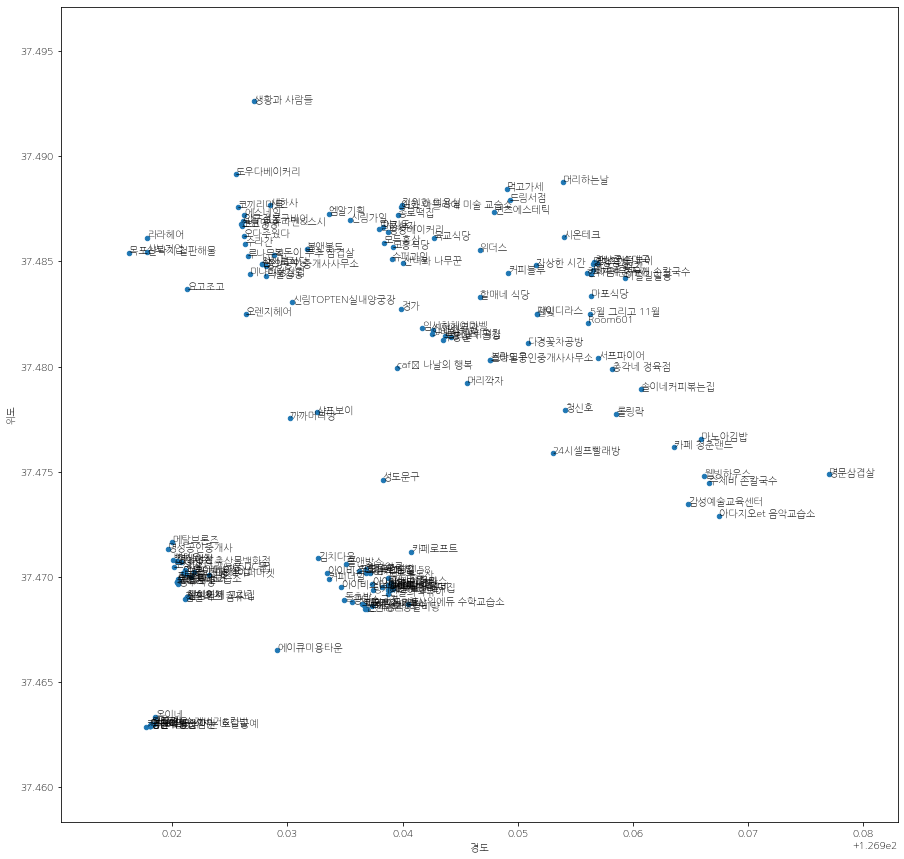

In [9]:
%matplotlib inline
from matplotlib import rcParams
from matplotlib import pyplot as plt
import matplotlib
import string
matplotlib.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(15, 15))
example.plot.scatter(x='경도', y='위도', ax=ax)
for _ in example.index:
    ax.annotate(example.loc[_]['구분'], (example.loc[_]['경도'], example.loc[_]['위도']))    

# **K Means Classifier**
- **[Clustering GPS Coordinates and Forming Regions with Python](https://levelup.gitconnected.com/clustering-gps-co-ordinates-forming-regions-4f50caa7e4a1)**
- **[Weighted K-Means Clustering of GPS Coordinates](https://medium.com/datadriveninvestor/weighted-k-means-clustering-of-gps-coordinates-python-7c6270846163)**

## **1 K Means Cluster 갯수 비교하기**
몇개를 기준으로 Clustering 할 것인가?

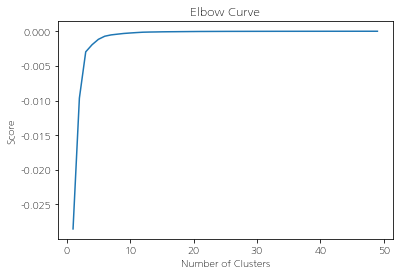

In [11]:
from sklearn.cluster import KMeans
# Clustering 기준을 몇개로 할 것인지 점수를 확인
# 분석결과 : 완만한 상승곡선으로 크게 구분시 차이가 없다
K_clusters = range(1,50)
kmeans = [ KMeans(n_clusters=i)  for i in K_clusters ]
Y_axis = example[['경도']]
X_axis = example[['위도']]
score  = [ kmeans[i].fit(Y_axis).score(Y_axis)  for i in range(len(kmeans)) ]

# Visualize
plt.plot(K_clusters, score); plt.xlabel('Number of Clusters')
plt.ylabel('Score'); plt.title('Elbow Curve'); plt.show()

## **2 K Means 37 개를 기준으로 비지도 학습**
37개를 기준으로 데이터 구분하기

In [12]:
from collections import Counter
# Compute k-means clustering.
kmeans = KMeans(n_clusters = 37, init ='k-means++')
kmeans.fit(example[example.columns[0:2]]) 
example['label'] = kmeans.fit_predict(example[example.columns[0:2]])
example['label'] = list(map(lambda x : x+1 , example['label'])) # 0 을 지우고 1개씩 더하기
# centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
# labels  = kmeans.predict(example[example.columns[0:2]]) # Labels of each point
result_count = Counter(example['label'].to_list())
result_count = sorted([f"Id{k:02d}:{v:02d}"  for k,v in result_count.items()])
", ".join(result_count)

'Id01:08, Id02:02, Id03:05, Id04:07, Id05:02, Id06:02, Id07:03, Id08:07, Id09:04, Id10:09, Id11:13, Id12:02, Id13:01, Id14:02, Id15:02, Id16:08, Id17:03, Id18:02, Id19:03, Id20:06, Id21:01, Id22:05, Id23:05, Id24:01, Id25:01, Id26:03, Id27:07, Id28:02, Id29:01, Id30:03, Id31:01, Id32:06, Id33:04, Id34:13, Id35:04, Id36:01, Id37:02'

In [20]:
example.head(3)

,경도,위도,구분,label
0,126.938397,37.485887,모든홍삼,8
1,126.939588,37.487197,종로떡집,35
2,126.939915,37.487700,김원화 미용실,35


## **3 Visualization**
37개를 기준으로 데이터 구분하기

In [32]:
# Adding the Color names
import matplotlib.colors as mcolors
color_names = list(mcolors.cnames.keys())
example['color'] = [color_names[_]  for _ in example["label"]]
example.head(3)

,경도,위도,구분,label,color
0,126.938397,37.485887,모든홍삼,8,blanchedalmond
1,126.939588,37.487197,종로떡집,35,darkslateblue
2,126.939915,37.487700,김원화 미용실,35,darkslateblue


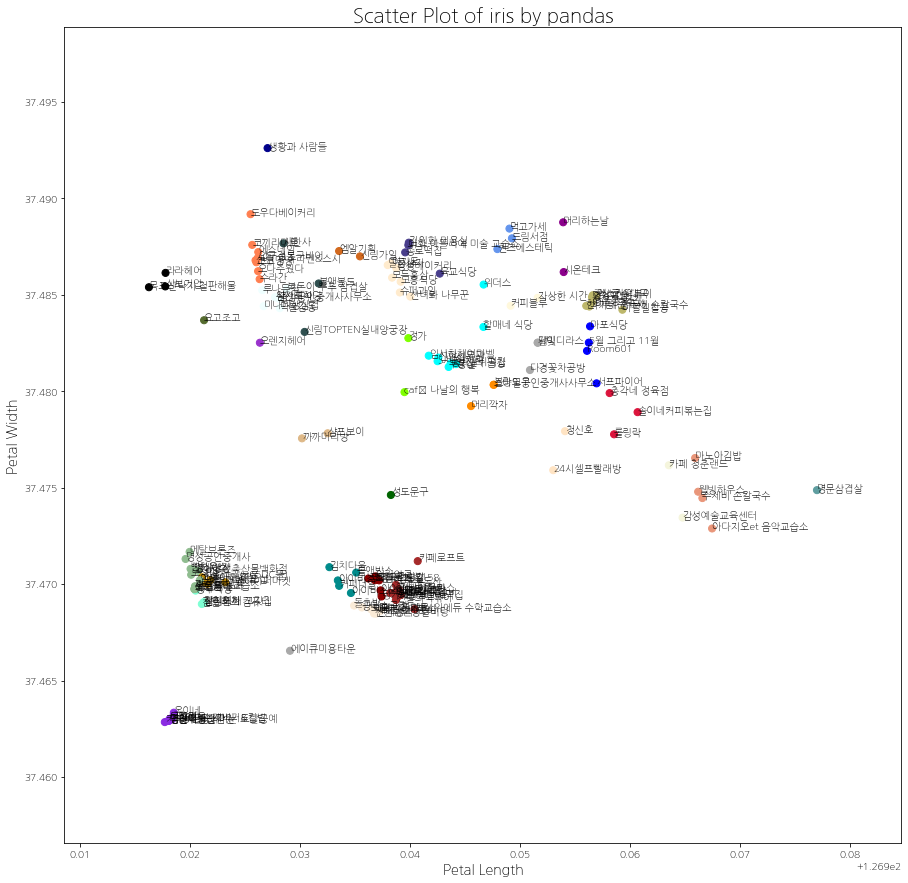

In [38]:
fig, ax = plt.subplots(figsize=(15, 15))
example.plot(kind = 'scatter',
              x = '경도', 
              y = '위도', 
              s = 50, # marker size
              c = example['color'],
              ax = ax) # marker color by group
for _ in example.index:
    ax.annotate(example.loc[_]['구분'], 
                (example.loc[_]['경도'], example.loc[_]['위도']), 
                fontsize=10) 
plt.title('Scatter Plot of iris by pandas', fontsize=20)
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.show()

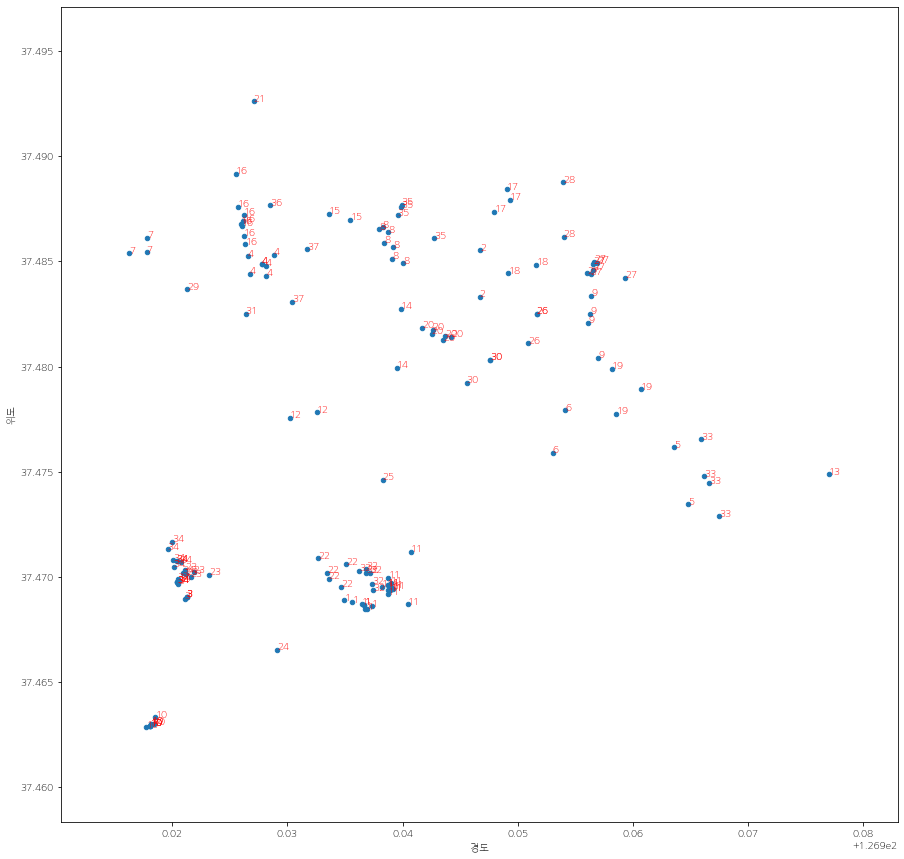

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))
example.plot.scatter(x='경도', y='위도', ax=ax)
for _ in example.index:
    ax.annotate(example.loc[_]['label'], (example.loc[_]['경도'], example.loc[_]['위도']), color='red') 

148

In [ ]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

In [ ]:
example.head(2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kmeans_instance = KMeans(n_clusters=37, max_iter=1000, init='k-means++')

classifier = KNeighborsClassifier(n_neighbors = 4).fit(example[['경도','위도']])
labels = kmeans.labels_
centers = kmeans.cluster_centers_
example['clustering'] = labels
example.head(3)

In [ ]:
kmeans = KMeans(n_clusters = 3, max_iter=1000, init ='k-means++')
lat_long = X_weighted[X_weighted.columns[1:3]]
lot_size = X_weighted[X_weighted.columns[3]]
weighted_kmeans_clusters = kmeans.fit(lat_long, sample_weight = lot_size) # Compute k-means clustering.
X_weighted['cluster_label'] = kmeans.predict(lat_long, sample_weight = lot_size)
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = X_weighted['cluster_label'] # Labels of each point
X_weighted.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clustering GPS Co-ordinates to Form Regions - Weighted',fontsize=18, fontweight='bold')

# **KNeighbors Classifier**
- [Matplotlib Font Setting](http://corazzon.github.io/matplotlib_font_setting)
- [Sklearn Classification](https://towardsdatascience.com/using-scikit-learns-binary-trees-to-efficiently-find-latitude-and-longitude-neighbors-909979bd929b)

## **1 Import Data to Visualization**
- [Matplotlib Font Setting](http://corazzon.github.io/matplotlib_font_setting)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
X = np.array([
    [-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]
])
example = pd.DataFrame(X)
example.columns = ["x", "y"]
fig, ax = plt.subplots(figsize=(3, 3))
example.plot.scatter(x="x", y="y", ax= ax)
example.head(3)

## **2 K-Nearest Neighbors Scikit-Learn**
- [k-Nearest Neighbors](https://pythonbasics.org/k-nearest-neighbors)
- [Matplotlib Font Setting](http://corazzon.github.io/matplotlib_font_setting)

In [ ]:
K = 2
nbrs = NearestNeighbors(n_neighbors = K, algorithm = 'ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
print(distances)

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Dataset
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target =  [0, 0, 0, 1, 1, 1]

# Fit a k-nearest neighbor model to the data
K = 3
model = KNeighborsClassifier(n_neighbors = K)
model.fit(X, target)
print(model)

# make predictions
print( '(-2,-2) is class'),
print( model.predict([[-2,-2]]) )

print( '(1,3) is class'),
print( model.predict([[1,3]]) )

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# dataset
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target =  [0, 0, 0, 1, 1, 1]

# fit a k-nearest neighbor model to the data
K = 3
model = KNeighborsClassifier(n_neighbors = K)
model.fit(X, target)
print(model)

# make predictions
print( '(-2,-2) is class'),
print( model.predict([[-2,-2]]) )

print( '(1,3) is class'),
print( model.predict([[1,3]]) )

In [ ]:
# for neighbors.
locations_b = [
    ['BOOMVANG HELIPORT / OIL PLATFORM', 27.35, -94.633],
    ['LEE COUNTY AIRPORT', 36.654, -83.218],
    ['ELLINGTON', 35.507, -86.804],
    ['LAWRENCEVILLE BRUNSWICK MUNI', 36.773, -77.794],
    ['PUTNAM CO', 39.63, -86.814]
]# Converting the lists to DataFrames. We will build the tree with
# the first and execute the query on the second.
locations_a = pd.DataFrame(locations_a, columns = column_names)
locations_b = pd.DataFrame(locations_b, columns = column_names)

In [ ]:
kd = KDTree(locations_a[["LAT", "LON"]].values, metric='euclidean')

In [ ]:
# The amount of neighbors to return.
# Executes a query with the second group. This will return two
# arrays.
from sklearn.neighbors import BallTree, KDTree
k = 2
distances, indices = kd.query(locations_b[["LAT", "LON"]], k = k)

In [ ]:
indices

In [ ]:
dataset = [
    [2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]
]

In [ ]:
# 유클리드 거리 구하는 공식
# calculate the Euclidean distance between two vectors
# row = [x, y, type]
from math import sqrt
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [ ]:
row0 = [3,3]
for row in dataset:
    distance = euclidean_distance(row0, row)
    print(distance)

In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

In [ ]:
import pandas as pd
df_data = pd.DataFrame(breast_cancer_data.data)
df_data.head(3)

In [ ]:
df_labels = pd.DataFrame(breast_cancer_data.target)
df_labels.head()
print(breast_cancer_data.target_names)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
training_points = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
training_labels = [0, 1, 1]
classifier.fit(training_points, training_labels)

In [ ]:
unknown_points = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]
guesses = classifier.predict(unknown_points)
guesses

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
table.describe()

In [ ]:
example.head(2)

## **2 K Means Clustering**
- [Matplotlib Font Setting](http://corazzon.github.io/matplotlib_font_setting)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4).fit(example[['경도','위도']])
labels = kmeans.labels_
centers = kmeans.cluster_centers_
example['clustering'] = labels
example.head(3)

In [ ]:
from collections import Counter


In [ ]:
Counter(example['clustering'].to_list())